#**GIỚI THIỆU**
###**- Đề tài:** DỰ ĐOÁN NHẤP CHUỘT VÀO QUẢNG CÁO.
###**- Phương pháp:** RF (**Random Forest**) và NCE (**Normalized Cross Entropy**) đánh giá hiệu suất mô hình .
###**- Nhãn dự đoán:** 1 "**Nhấp chuột**" hoặc 0 "**Không nhấp chuột**"
###**- Bộ dữ liệu:**: [Ad Click Prediction Dataset](https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset)


#**THÔNG TIN CHI TIẾT**

**Bộ dữ liệu** này cung cấp thông tin chi tiết về hành vi của người dùng và quảng cáo trực tuyến, đặc biệt tập trung vào việc **dự đoán liệu người dùng có nhấp vào quảng cáo** trực tuyến hay không. Nó chứa thông tin nhân khẩu học của người dùng, thói quen duyệt web và các chi tiết liên quan đến việc hiển thị quảng cáo.


# **IMPORT THƯ VIỆN**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# **ĐỌC DỮ LIỆU**

In [3]:
df = pd.read_csv('/content/ad_click_dataset.csv')

# **KHÁM PHÁ DỮ LIỆU**

## **In ra 10 dòng đầu**

In [4]:
df.head(10)

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
5,5942,User5942,NaN,Non-Binary,NaN,Bottom,Social Media,Evening,1
6,7808,User7808,26.0,Female,Desktop,Top,NaN,NaN,1
7,5065,User5065,40.0,Male,Mobile,Side,NaN,Evening,0
8,7993,User7993,NaN,Non-Binary,Mobile,Bottom,Social Media,NaN,1
9,4509,User4509,NaN,NaN,NaN,Bottom,Education,Afternoon,1


## **Thông tin tổng quan**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


## **Thống kê mô tả**

In [6]:
df.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


##**Kiểm tra dữ liệu thiếu**

In [7]:
df.isnull().sum()

,0
id,0
full_name,0
age,4766
gender,4693
device_type,2000
ad_position,2000
browsing_history,4782
time_of_day,2000
click,0


## **Kiểm nhãn mục tiêu**

click
1    6500
0    3500
Name: count, dtype: int64


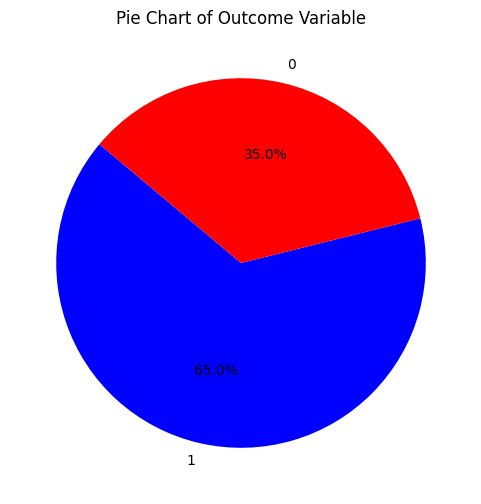

In [13]:
counts = df['click'].value_counts()
print(counts)
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'red'], startangle=140)
plt.title('Pie Chart of Outcome Variable')
plt.show()

## **Truy xuất các đặc trưng**

### **Biến số Numerical**

In [10]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['id', 'age', 'click'], dtype='object')

### **Biến Categorical**

In [11]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['full_name', 'gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object')

## **PHÂN TÍCH ĐƠN BIẾN**

### **Biểu đồ histogram kiểm tra tần số xuất hiện**

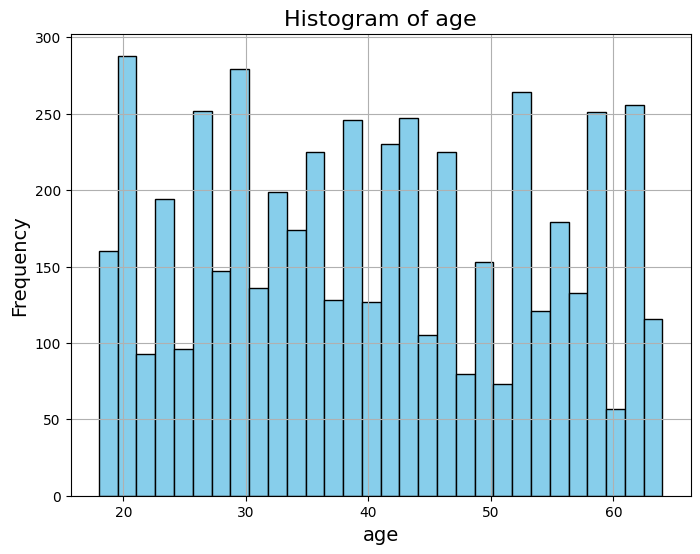

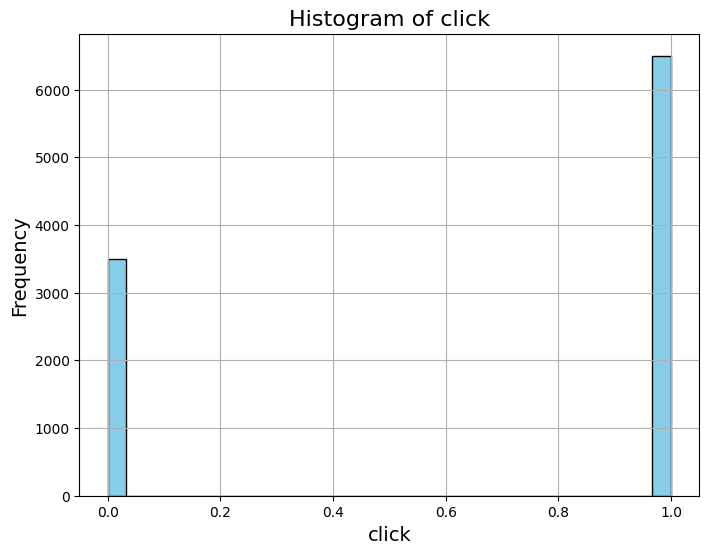

In [12]:
numerical_features = ['age', 'click']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {feature}', fontsize=16)
  plt.xlabel(feature, fontsize=14)
  plt.ylabel('Frequency', fontsize=14)
  plt.grid(True)
  plt.show()

### **Biểu đồ Violin Plot**

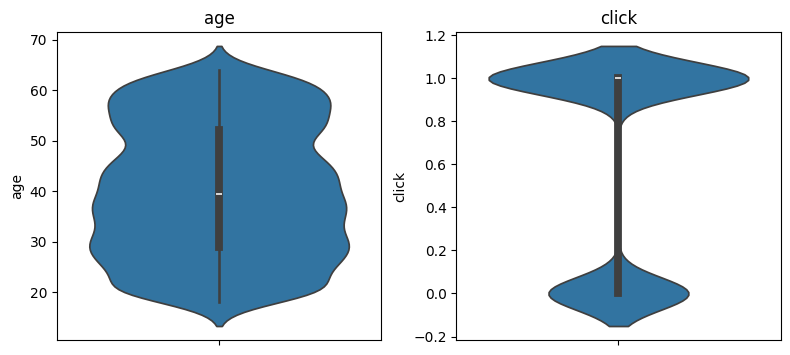

In [17]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(12, 20))

# Vẽ biểu đồ violin plot cho từng đặc trưng
for i, feature in enumerate(numerical_features):
    plt.subplot(6, 3, i + 1)
    sns.violinplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

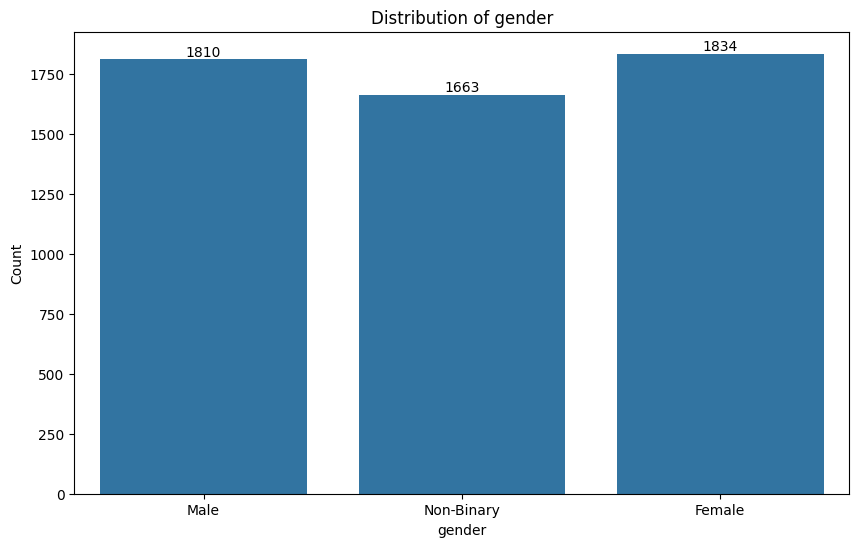

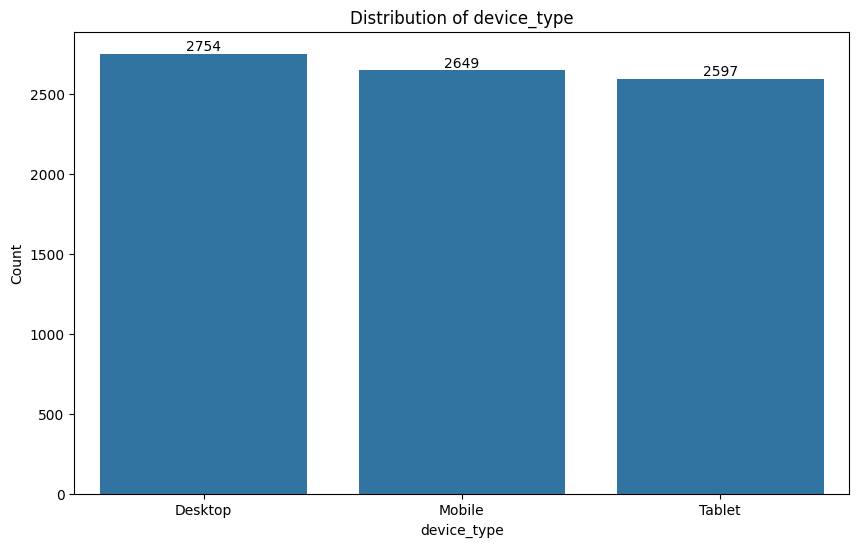

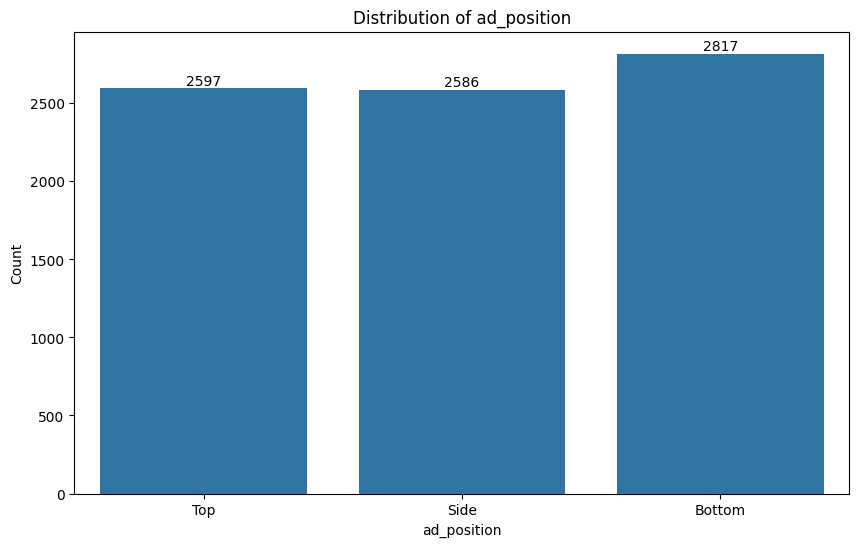

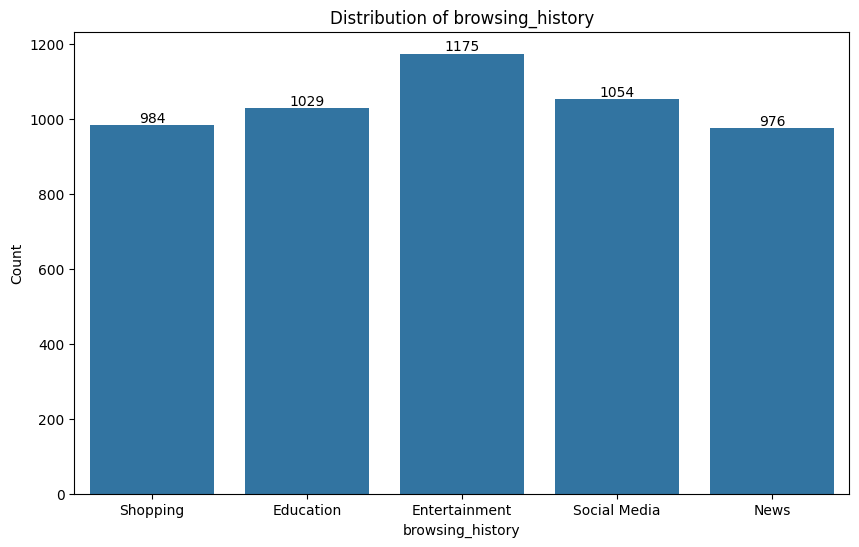

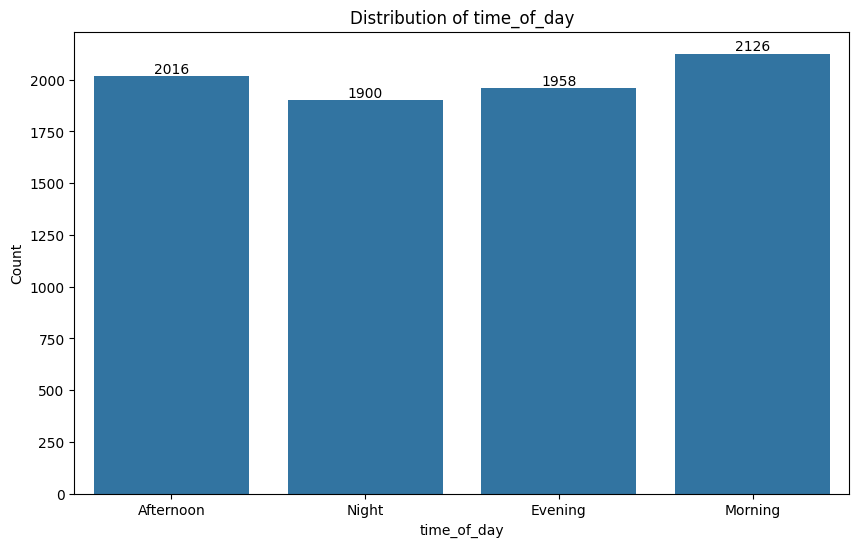

In [16]:
categorical_features = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    ax=sns.countplot(x=feature,data=df)
    ax.bar_label(ax.containers[0])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## **PHÂN TÍCH 2 BIẾN**

### **Age với Click**

Text(0, 0.5, 'Age')

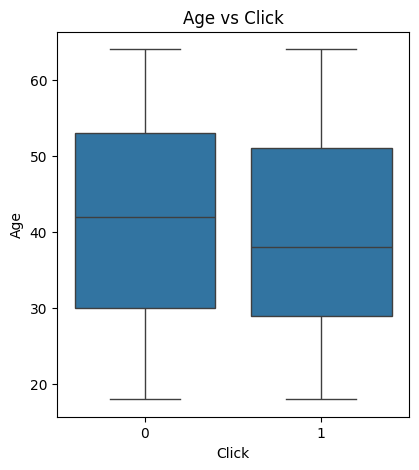

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='click', y='age', data=df)
plt.title('Age vs Click')
plt.xlabel('Click')
plt.ylabel('Age')

### **Device type với Click**

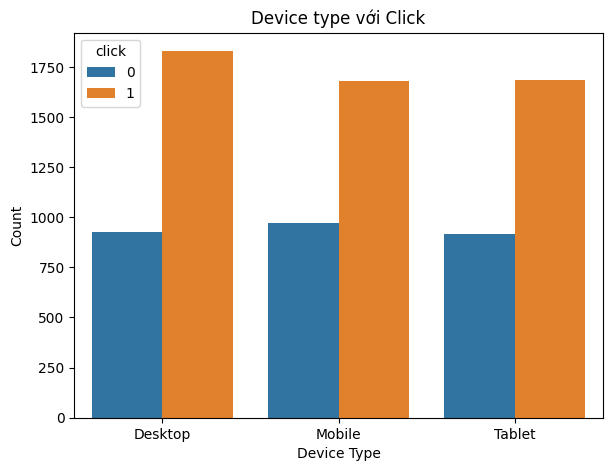

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='device_type', hue='click', data=df)
plt.title('Device type với Click')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.show()

### **Ad position với Click**

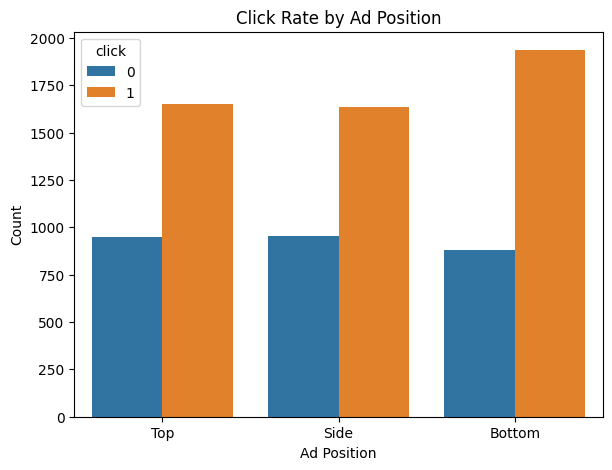

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='ad_position', hue='click', data=df)
plt.title('Click Rate by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Count')
plt.show()

### **Browsing history với Click**

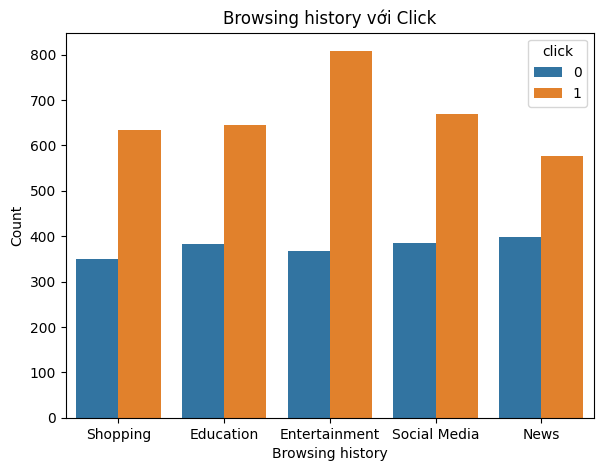

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='browsing_history', hue='click', data=df)
plt.title('Browsing history với Click')
plt.xlabel('Browsing history')
plt.ylabel('Count')
plt.show()

### **Time of day với Click**

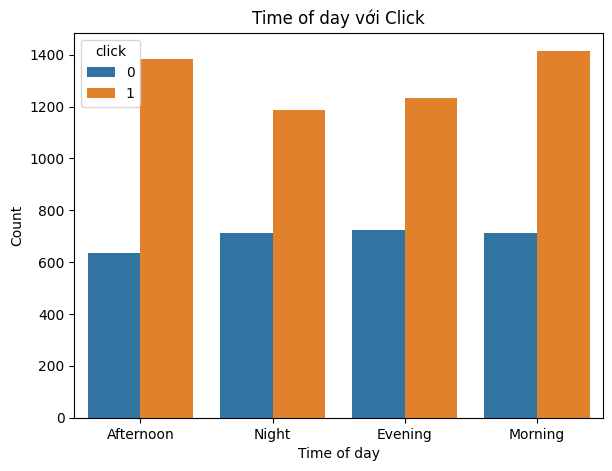

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='time_of_day', hue='click', data=df)
plt.title('Time of day với Click')
plt.xlabel('Time of day')
plt.ylabel('Count')
plt.show()

# **TIỀN XỬ LÝ**

## **Xóa đặc trưng không cần thiết**

In [23]:
df = df.drop(columns=['id', 'full_name'], axis=1)

## **Mã hóa đặc trưng Categorical**

In [25]:
# Hàm mã hóa đặc trưng
def encode_feature(df, column, categories):
    mapping = {category: i for i, category in enumerate(categories)}
    mapping[np.nan] = -1  # Mã hóa NaN thành -1
    return df[column].map(mapping)

# Mã hóa các đặc trưng
categories = {
    'gender': ["Male", "Female", "Non-Binary"],
    'device_type': ["Mobile", "Desktop", "Tablet"],
    'ad_position': ["Top", "Side", "Bottom"],
    'browsing_history': ["Shopping", "News", "Entertainment", "Education", "Social Media"],
    'time_of_day': ["Morning", "Afternoon", "Evening", "Night"]
}
for column, values in categories.items():
    df[column] = encode_feature(df, column, values)

## **Điền giá trị thiếu**

In [26]:
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

## **Chuẩn hóa đặc trưng Numerical**

In [30]:
scaler = StandardScaler()
df_imputed['age'] = scaler.fit_transform(df_imputed[['age']])

# **HUẤN LUYỆN**

In [36]:
# Chuẩn bị dữ liệu
X = df_imputed.drop(columns=['click'], axis=1)
y = df_imputed['click']

# Chia tập dữ liệu thành huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng SMOTE để xử lý mất cân bằng
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tính Log Loss
ctr_rate = y_train_resampled.mean()
logloss_rate = -(ctr_rate * np.log(ctr_rate) + (1 - ctr_rate) * np.log(1 - ctr_rate))
print(f"LogLoss: {logloss_rate:.4f}")

# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Dự đoán xác suất và nhãn trên tập kiểm tra
rf_predictions_proba = rf_model.predict_proba(X_test)[:, 1]
rf_predictions = rf_model.predict(X_test)

# Tính các chỉ số đánh giá
roc_auc = roc_auc_score(y_test, rf_predictions_proba)
logloss = log_loss(y_test, rf_predictions_proba)
nce = logloss / logloss_rate
accuracy = accuracy_score(y_test, rf_predictions)

# Hiển thị kết quả
print("\nRandom Forest:")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"LogLoss: {logloss:.4f}")
print(f"NCE: {nce:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

LogLoss: 0.6931

Random Forest:
ROC-AUC: 0.9147
LogLoss: 0.3977
NCE: 0.5737
Accuracy: 0.8330
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       705
         1.0       0.85      0.91      0.88      1295

    accuracy                           0.83      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.83      0.83      0.83      2000

